In [1]:
#Daily time
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
 (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
 (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
 (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
 (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

In [2]:
#Task7.1
low_study = []
moderate_study = []
high_study = []
for study, ent, sleep in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)
print("Low (<3):", low_study)
print("Moderate (3-5):", moderate_study)
print("High (>5):", high_study)


Low (<3): [2.5, 1.5, 2.0, 2.5]
Moderate (3-5): [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High (>5): [5.5, 6.0]


In [3]:
#7.2
counts = {
    "low": len(low_study),
    "moderate": len(moderate_study),
    "high": len(high_study)
}
print("Counts:", counts)

Counts: {'low': 4, 'moderate': 9, 'high': 2}


In [4]:
#7.3
study_minutes = [s * 60 for s, e, sl in time_data]
print("Study minutes (all days):", study_minutes)
print("First 5 study-minute values:", study_minutes[:5])

Study minutes (all days): [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]
First 5 study-minute values: [210.0, 300.0, 150.0, 240.0, 90.0]


In [6]:
#7.4
study_hours = [s for s, e, sl in time_data]
ent_hours = [e for s, e, sl in time_data]
sleep_hours = [sl for s, e, sl in time_data]
avg_study = sum(study_hours) / len(study_hours)
avg_ent = sum(ent_hours) / len(ent_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

In [7]:
print(f"Average study hours: {avg_study:.2f}")
print(f"Average entertainment hours: {avg_ent:.2f}")
print(f"Average sleep hours: {avg_sleep:.2f}")


Average study hours: 3.70
Average entertainment hours: 2.50
Average sleep hours: 7.17


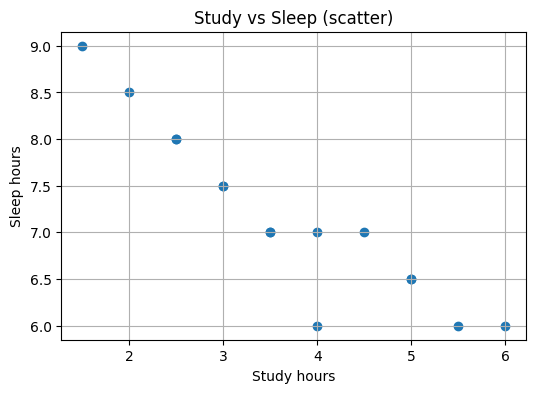

In [9]:
#7.5
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study hours")
plt.ylabel("Sleep hours")
plt.title("Study vs Sleep (scatter)")
plt.grid(True)
plt.show()

In [10]:
#8.1.1 task 1.1
def sum_nested_list(nested_list):
  total=0
  for element in nested_list:
    if isinstance(element,list):
      total+=sum_nested_list(element)
    else:
      total+=element
  return total
print(sum_nested_list([1, [2, [3, 4], 5], 6, [7, 8]]))
print(sum_nested_list([1, [2, 3], [4, [5]]]))

36
15


In [11]:
#8.1.1 task 2
def generate_permutations(s):
    if len(s) <= 1:
        return [s]
    perms = []
    used = set()
    for i, char in enumerate(s):
        if char in used:
            continue
        used.add(char)
        remaining = s[:i] + s[i+1:]
        for p in generate_permutations(remaining):
            perms.append(char + p)

    return perms

print(generate_permutations("abc"))
print(generate_permutations("aab"))


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


In [13]:
#8.1.1 Task3.1
def calculate_directory_size(directory):
    overall_size = 0
    for key,value in directory.items():
        if isinstance(value,dict):
            overall_size += calculate_directory_size(value)
        else:
            overall_size += value
    return overall_size


In [14]:
#8.1.1 Task3.2
#directory structure
directory_structure = {
 "file1.txt": 200,
 "file2.txt": 300,
 "subdir1": {
 "file3.txt": 400,
 "file4.txt": 100
 },
 "subdir2": {
 "subsubdir1": {
 "file5.txt": 250
 },
 "file6.txt": 150
 }
 }
print(f"The total size of the directory is {calculate_directory_size(directory_structure)} KB.")


The total size of the directory is 1400 KB.


In [15]:
#8.2.1 task1.1
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1
coins = [1,2,5]
amount = 11
print(min_coins(coins,amount))
coins = [2]
amount = 3
print(min_coins(coins,amount))

3
-1


In [16]:
#8.2.1 Task2.1
def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[n][m]
    #task2.2
print(longest_common_subsequence("abcde", "ace"))


3


In [17]:
#8.2.1 task3.1
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] > w:
                # Item doesn't fit
                dp[i][w] = dp[i - 1][w]
            else:
                dp[i][w] = max(
                    dp[i - 1][w],
                    values[i - 1] + dp[i - 1][w - weights[i - 1]]
                )
    return dp[n][capacity]
weights = [1, 3, 4, 5]
values  = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))

9
